# Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as mpl
import os

Download the data and save it as a pandas DataFrame.

major crypyo currency chosen usdt-usd



In [5]:
initial_data = yf.download("USDT-USD", start="2020-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,0.999571,1.006873,0.994924,0.999836,0.999836,21503143454
2020-01-02,0.999788,1.008451,0.986515,1.001565,1.001565,24212314977
2020-01-03,1.001183,1.022286,0.988027,1.004192,1.004192,32420287856
2020-01-04,1.003510,1.013633,0.999160,1.007472,1.007472,21585629320
2020-01-05,1.009921,1.016161,1.001758,1.006197,1.006197,24090142146


In [7]:
initial_data['Adj Close'].head()

Date
2020-01-01    0.999836
2020-01-02    1.001565
2020-01-03    1.004192
2020-01-04    1.007472
2020-01-05    1.006197
Name: Adj Close, dtype: float64

Set the Adj Closed data as a new DataFrame we will use.

In [8]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-01-01 to 2021-12-30
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [9]:
data.head()

Date
2020-01-01    0.999836
2020-01-02    1.001565
2020-01-03    1.004192
2020-01-04    1.007472
2020-01-05    1.006197
Name: Adj Close, dtype: float64

In [10]:
data.tail()

Date
2021-12-26    1.000449
2021-12-27    0.999944
2021-12-28    1.001168
2021-12-29    1.000294
2021-12-30    1.001036
Name: Adj Close, dtype: float64

In [11]:
data = yf.download("USDT-USD", start="2020-01-01", end="2020-01-31")

[*********************100%***********************]  1 of 1 completed


In [17]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))



The spot price is 1.0


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

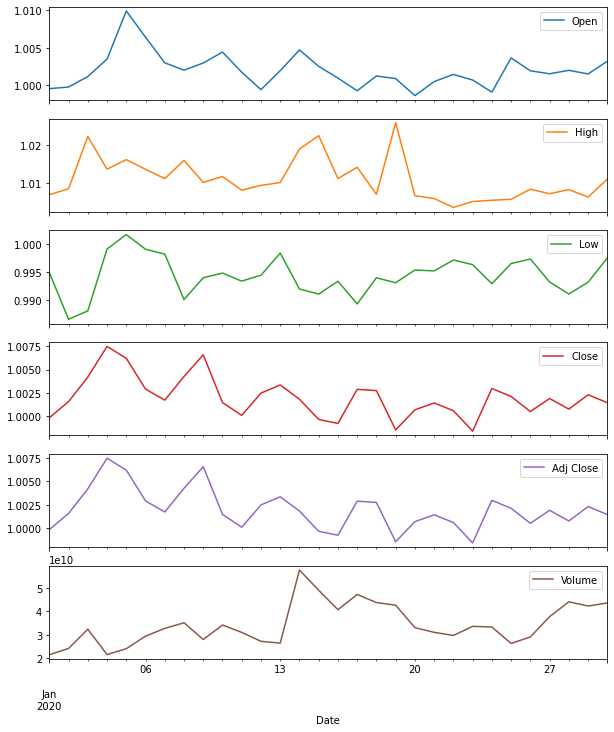

In [13]:
data.plot(figsize=(10, 12), subplots=True)

Find the log return of Index

In [14]:
data = yf.download("USDT-USD", start="2020-01-01", end="2020-01-31")

[*********************100%***********************]  1 of 1 completed


In [15]:
log_return = np.log(data['Adj Close']) / data['Adj Close'].shift(1)

Calculate its standard deviation and annualised it

In [16]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 4.15 %


Volatility measures of how much its price changes in a given period of time. When a stock that normally trades in a 1% range of its price on a daily basis suddenly trades 4-5% of its price, it's considered to be experiencing “high volatility.” Based on our computation, volatility is 4.15%. since the that normally trades are in a 1% range of its price on a daily basis and suddenly trades 4-5% of its price, it's considered to be experiencing “high volatility.” The high volatility was experienced in 2020 due to Covid 19 and stable in 2021.

Compare it with the VIX data

Download VIX data for comparison

In [19]:
VIX = yf.download("^VIX", start="2020-01-01", end="2020-01-31")

[*********************100%***********************]  1 of 1 completed


In [20]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 15.49 %


# Black scholes Model



import numpy as np

import pandas as pd import matplotlib.pyplot as plt import scipy.stats as si import yfinance as yf

## European Options

Non-Dividend Paying Options

In [50]:
import scipy.stats as si

In [51]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [52]:
S = 1
K = 0.95
T = 0.083  # 1 month time period
r = 0.03
vol = 0.0415
payoff = "call"

In [53]:
euro_option_bs(1, 0.95, 0.083, 0.03, 0.0415, 'call')

0.05236256553763785

In [54]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

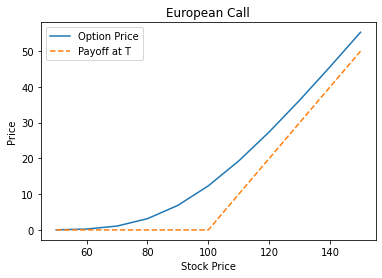

In [56]:
fig = mpl.figure()
mpl.plot(S, cp, '-')
mpl.plot(S, np.maximum(S-100,0), '--')
mpl.xlabel('Stock Price')
mpl.ylabel('Price')
mpl.title('European Call')
mpl.legend(['Option Price','Payoff at T'])

# Monte Carlo Simulation

# It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.

In [57]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [58]:
T = 0.083
r = 0.03
sigma = 0.415
S0 = 1
K = 0.95

In [59]:
S = mcs_simulation_np(1000)

In [60]:
S = np.transpose(S)
S

array([[1.        , 1.00128337, 0.99801604, ..., 0.87315645, 0.87325028,
        0.8681695 ],
       [1.        , 1.00339783, 1.00615152, ..., 0.97719498, 0.9802554 ,
        0.98141676],
       [1.        , 1.00409268, 1.00925057, ..., 0.84589128, 0.85209854,
        0.85151622],
       ...,
       [1.        , 1.00377664, 1.00537813, ..., 1.10455719, 1.10738167,
        1.10343539],
       [1.        , 0.99905981, 0.99643235, ..., 0.81945315, 0.82083937,
        0.81920294],
       [1.        , 1.00193464, 1.00117098, ..., 1.07159614, 1.07378452,
        1.06654082]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

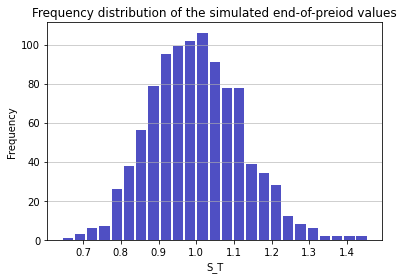

In [61]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [63]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.07770109032572986


# Greeks

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# Option Value

In [65]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [126]:
T = 0.083                             
r = 0.03
sigma = 0.0415
S0 = 1
K = 0.95
q = 0

In [125]:
euro_option_bsm(1, 0.95, 0.083, 0, 0.03, 0.415, 'call')

0.07398360421196437

In [88]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Put [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

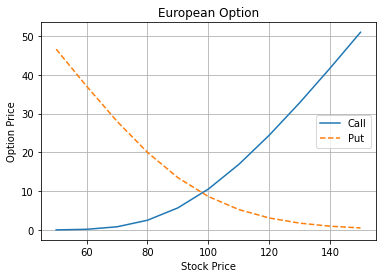

In [89]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [90]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [127]:
T = 0.083                              #S: spot price
r = 0.03                               #K: strike price
sigma = 0.0415                         #T: time to maturity
S0 = 1                                  #r: risk free rate
K = 0.95                                #vol: volatility of underlying asset
q = 0                                   #q: continuous dividend yield

In [129]:
delta(1, 0.95, 0.083, 0.03, 0, 0.0415, 'call')

0.9999966719739531

In [100]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

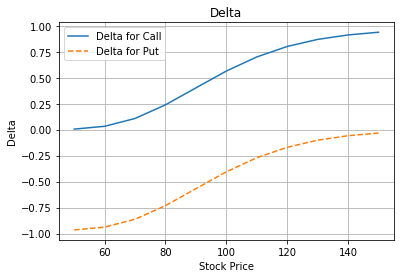

In [101]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [102]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [130]:
T = 0.083
r = 0.03
sigma = 0.0415
S0 = 1
K = 0.95
q = 0

In [132]:
gamma(1, 0.95, 0.083, 0.03, 0, 0.0415, 'call')

0.0013106500417696064

In [114]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

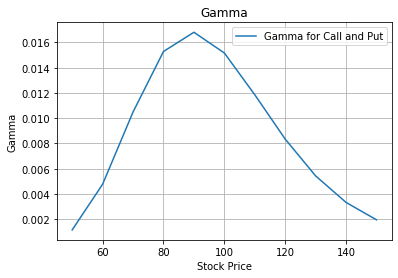

In [115]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# Speed

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [116]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [146]:
T = 0.083
r = 0.03
sigma = 0.0415
S0 = 1
K = 0.95
q = 0

In [147]:
speed(1, 0.95, 0.0833, 0.03, 0, 0.0415, 'call')

-0.14692524672550725

In [135]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

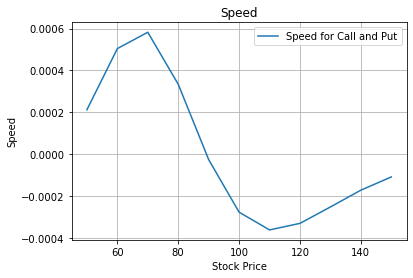

In [136]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [121]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [122]:
T = 0.083
r = 0.03
sigma = 0.0415
S0 = 1
K = 0.95
q = 0

In [137]:
theta(1, 0.95, 1, 0.05, 0.03, 0.0415, 'call')

0.017011391287905468

In [138]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(100, 100, T[i], 0.05, 0.03, 0.25, 'call')
    Theta_Put [i] = theta(100, 100, T[i], 0.05, 0.03, 0.25, 'put')

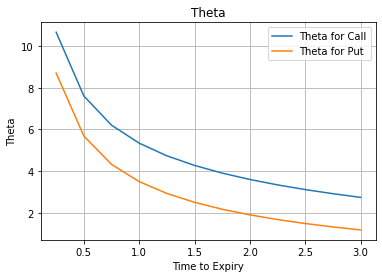

In [139]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [141]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [ ]:
T = 0.083
r = 0.03
vio = 0.0415
S = 1
K = 0.95
q = 0

In [142]:
rho(1, 0.95, 0.083, 0.03, 0, 0.0415, 'call')

0.07865363083421417

In [145]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'call')
    Rho_Put [i] = rho(100, 100, 1, r[i], 0.03, 0.25, 'put')

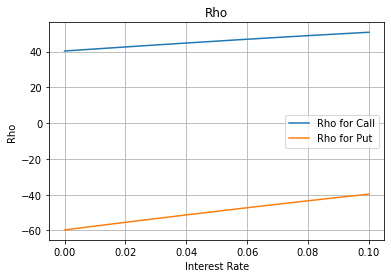

In [144]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])